# Read weather data

In [99]:
#imoort modules
import pandas as pd
import matplotlib
matplotlib.rc('font', family='NanumGothic')  # for Japanese
#magic command for plot
%matplotlib inline

import os

['2013.csv', '2014.csv', '2015.csv', '2016.csv', '2017.csv']


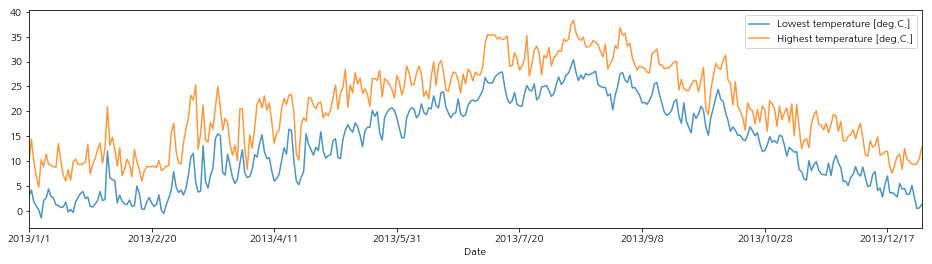

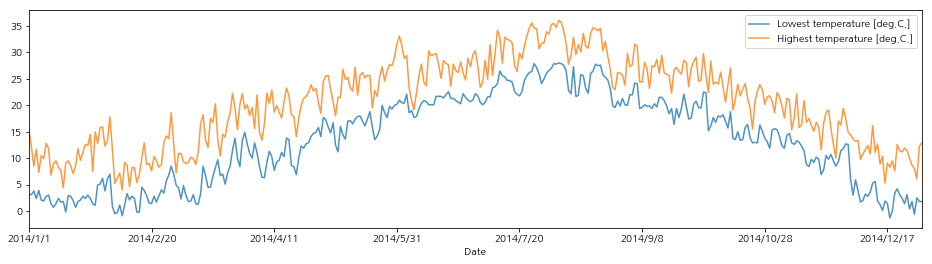

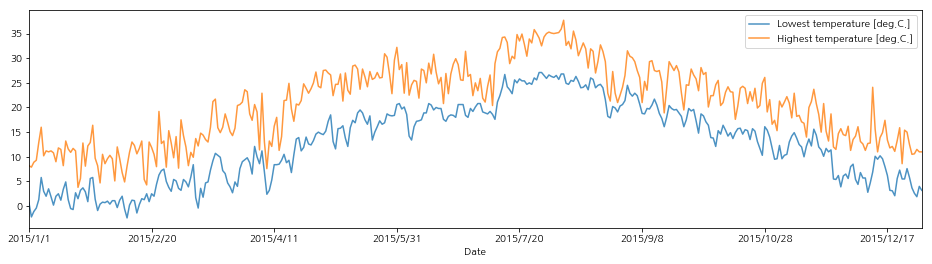

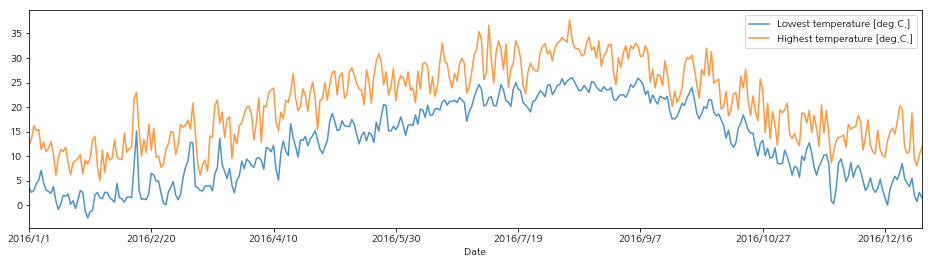

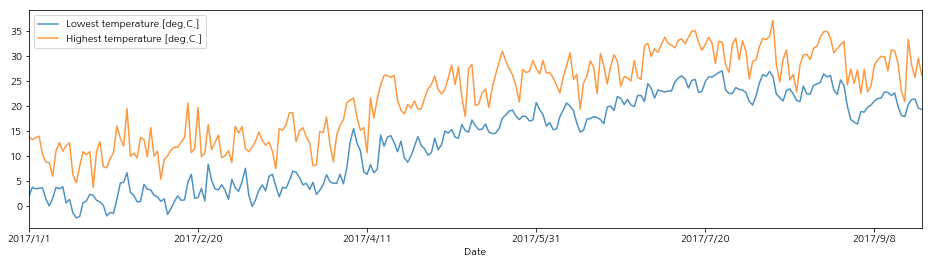

In [157]:
# Get file list
data_dir = '/home/kuchida/Downloads/weather/'  #Enter path to data dir.
dataFileList = os.listdir(data_dir)
dataFileList.sort()
print(dataFileList)

# Read data
dfList = []
for filename in dataFileList:
    abs_path = str(data_dir + filename)
    df = pd.read_csv(abs_path,
                     delimiter=',',
                     index_col=None,
                     header=None,
                     skiprows=6,
                     encoding='shift-jis'
                    )
    #df.head()
    #df.columns = [u'Tokyo', u'`Oosaka', u'Nagoya']
    #df.index = pd.to_datetime(df.index)
    df_tokyo = df.iloc[:, [0,1,4,7,9,14,18,21]] 
    df_oosaka = df.iloc[:, [0,1+23,4+23,7+23,9+23,14+23,18+23,21+23]] 
    df_nagoya = df.iloc[:, [0,1+46,4+46,7+46,9+46,14+46,18+46,21+46]] 
    labelList =  ['Date', 'Highest temperature [deg.C.]', 'Lowest temperature [deg.C.]', 'Average temperature [deg.C.]',
                  'Precipitation [mm]','Hours of daylight [hours]', 'Average humidity [%]','Average pressure [hPa]']
    df_tokyo.columns = labelList
    df_oosaka.columns = labelList
    df_nagoya.columns = labelList
    #df_tokyo['Location'] = ['Tokyo']
    dfList.append(df_tokyo)
    
dfList[0].head()

# Create plot
for i in range(len(dataFileList)):
    dfList[i].plot(x=0, y=['Lowest temperature [deg.C.]','Highest temperature [deg.C.]'],alpha=0.8, figsize=(16,4))
